# Description
The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

# Description of experiment
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

# 1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading the data

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


# 3. Data Pre-processing

### Checking for duplicates

In [6]:
print('Number of duplicates in train: ', sum(train.duplicated()))
print('Number of duplicates in test: ', sum(test.duplicated()))

Number of duplicates in train:  0
Number of duplicates in test:  0


### Checking for null values

In [7]:
print('Number of null values in train: ', train.isna().values.sum())
print('Number of null values in test: ', test.isna().values.sum())

Number of null values in train:  0
Number of null values in test:  0


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

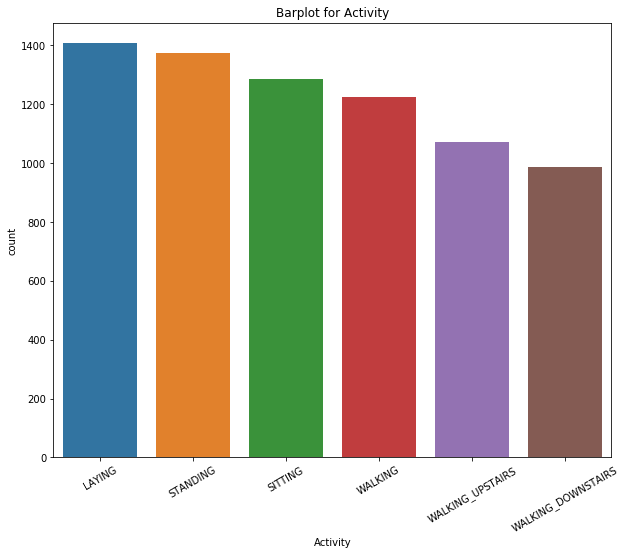

In [10]:
plt.figure(figsize=(10,8))
plt.title('Barplot for Activity')
sns.countplot(train.Activity,order=train.Activity.value_counts().index)

plt.xticks(rotation=30)

# 4. Exploratory Data Analysis

### which features are present

In [11]:
from collections import Counter

In [12]:
a=[col.split('-')[0].split('(')[0] for col in train.columns]

In [13]:
a

['tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',


In [15]:
pd.DataFrame.from_dict(Counter(a),orient='index')\
.rename(columns={0:'count'}).sort_values('count',ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


### Inference: Analysed the number of actual features present and their counts by splitting the main feature from its statistical measures

### Analysing tBodyAccMag-mean feature

Text(-0.1, 10, 'Dynamic Activities')

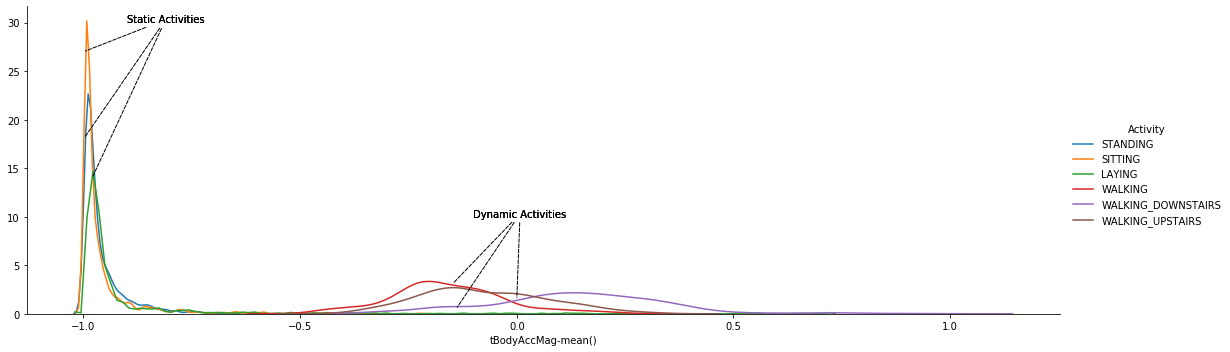

In [32]:
facetgrid=sns.FacetGrid(train,hue='Activity', height=5, aspect=3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist=False).add_legend()


plt.annotate("Static Activities", xy=(-1.0, 27), xytext=(-0.9, 30), arrowprops= {'arrowstyle':'-','ls':'dashed'})
plt.annotate("Static Activities", xy=(-1.0, 18), xytext=(-0.9, 30), arrowprops= {'arrowstyle':'-','ls':'dashed'})
plt.annotate("Static Activities", xy=(-0.98, 14), xytext=(-0.9, 30), arrowprops= {'arrowstyle':'-','ls':'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.15, 3), xytext=(-0.1, 10), arrowprops= {'arrowstyle':'-','ls':'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.14, 0.5), xytext=(-0.1, 10), arrowprops= {'arrowstyle':'-','ls':'dashed'})
plt.annotate("Dynamic Activities", xy=(0.0, 1.5), xytext=(-0.1, 10), arrowprops= {'arrowstyle':'-','ls':'dashed'})


#### digging deeper

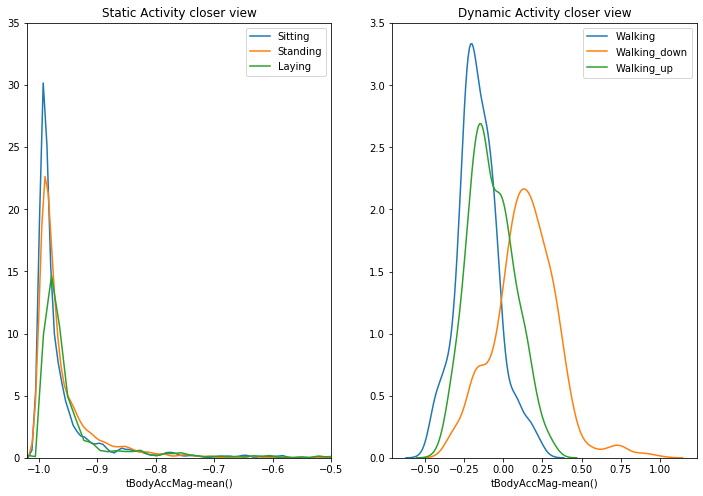

In [33]:
plt.figure(figsize=(12,8))

plt.subplot(1, 2 ,1 )
plt.title("Static Activity closer view")
sns.distplot(train[train['Activity']=="SITTING"] ['tBodyAccMag-mean()'], hist=False, label='Sitting')
sns.distplot(train[train['Activity']=="STANDING"] ['tBodyAccMag-mean()'], hist=False, label='Standing')
sns.distplot(train[train['Activity']=="LAYING"] ['tBodyAccMag-mean()'], hist=False, label='Laying')
plt.axis([-1.02, -0.5, 0, 35])



plt.subplot(1, 2 ,2)
plt.title("Dynamic Activity closer view")
sns.distplot(train[train['Activity']=="WALKING"] ['tBodyAccMag-mean()'], hist=False, label='Walking')
sns.distplot(train[train['Activity']=="WALKING_DOWNSTAIRS"] ['tBodyAccMag-mean()'], hist=False, label='Walking_down')
sns.distplot(train[train['Activity']=="WALKING_UPSTAIRS"] ['tBodyAccMag-mean()'], hist=False, label='Walking_up')



(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

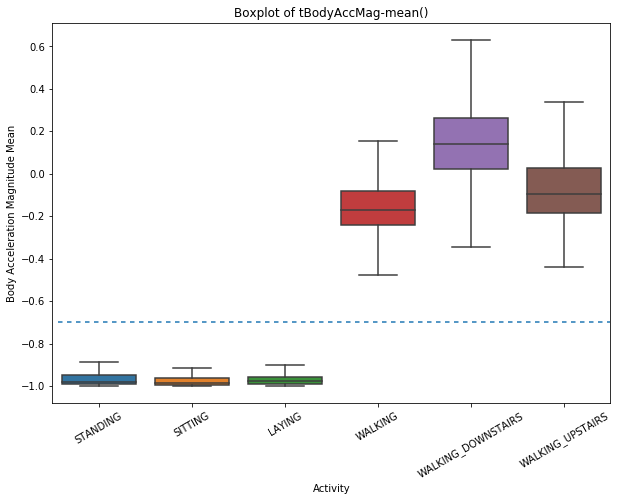

In [40]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()', data=train, showfliers=False)
plt.title('Boxplot of tBodyAccMag-mean()')
plt.ylabel('Body Acceleration Magnitude Mean')

plt.axhline(y=-0.7, xmin=0.01, dashes=(3,3))
plt.xticks(rotation=30)

### Analysing the angle between x-axis and gravityMean feature

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

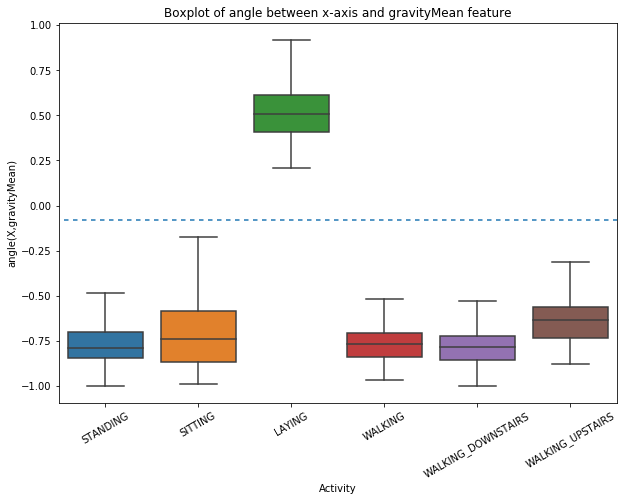

In [41]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.title('Boxplot of angle between x-axis and gravityMean feature')
plt.ylabel('angle(X,gravityMean)')

plt.axhline(y=-0.08, xmin=0.01, dashes=(3,3))
plt.xticks(rotation=30)

### Analysing the angle between y-axis and gravityMean feature¶

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

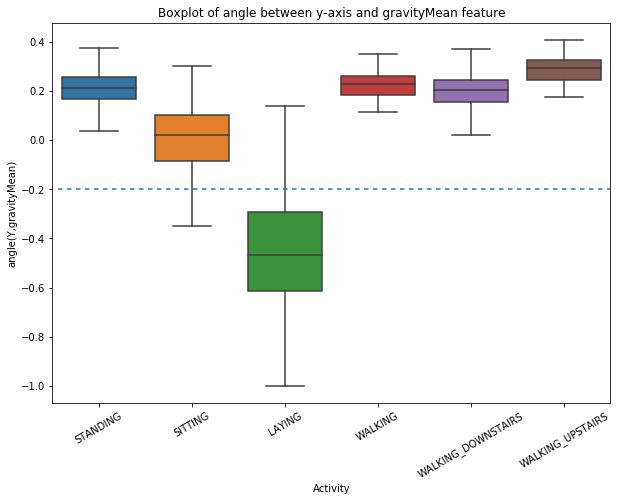

In [43]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data=train, showfliers=False)
plt.title('Boxplot of angle between y-axis and gravityMean feature')
plt.ylabel('angle(Y,gravityMean)')

plt.axhline(y=-0.2, xmin=0.01, dashes=(3,3))
plt.xticks(rotation=30)

### Visualising data using PCA

In [44]:
from sklearn.decomposition import PCA

In [46]:
x_for_pca=train.drop(['subject', 'Activity'], axis=1)
pca=PCA(n_components=2, random_state=42).fit_transform(x_for_pca)

In [47]:
pca

array([[-5.5202803 , -0.29027708],
       [-5.53534954, -0.08253013],
       [-5.47498801,  0.28738711],
       ...,
       [ 5.85750527, -3.08184327],
       [ 5.42109482, -3.42643005],
       [ 5.49797027, -2.78992864]])

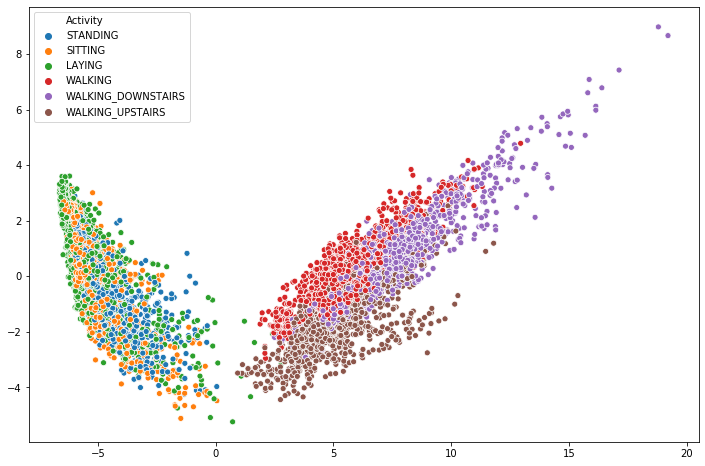

In [49]:
plt.figure(figsize=(12,8))

sns.scatterplot(x=pca[:,0], y=pca[: ,1], hue=train['Activity'])

# ML Models

### getting training and testing data ready

In [50]:
x_train=train.drop(['subject', 'Activity'], axis=1)
x_test=test.drop(['subject', 'Activity'], axis=1)

y_train=train.Activity
y_test=test.Activity

In [51]:
x_train.shape

(7352, 561)

In [52]:
x_test.shape

(2947, 561)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


### Logistic Regression Model with Hyperparameter Tuning and Cross Validation

In [57]:
parameters={'max_iter':[100, 200, 300, 500]}
lr_classifier=LogisticRegression()
lr_classifier_rs=RandomizedSearchCV (lr_classifier, param_distributions=parameters, cv=5, random_state=42)
lr_classifier_rs.fit( x_train, y_train)

y_pred=lr_classifier_rs.predict( x_test)

In [58]:
def get_best_params(model):
    print('best estimator: ',model.best_estimator_ )
    print('best set of parameters: ', model.best_params_ )

In [60]:
get_best_params(lr_classifier_rs)

best estimator:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
best set of parameters:  {'max_iter': 500}


In [61]:
lr_accuracy=accuracy_score(y_pred,y_test)
print("Accuracy of Logistic Regression: ", lr_accuracy)

Accuracy of Logistic Regression:  0.9609772650152698


In [62]:
cm=confusion_matrix(y_test.values, y_pred)

In [63]:
cm

array([[537,   0,   0,   0,   0,   0],
       [  0, 432,  56,   0,   0,   3],
       [  0,  11, 520,   1,   0,   0],
       [  0,   0,   0, 493,   3,   0],
       [  0,   0,   0,   3, 405,  12],
       [  0,   0,   0,  25,   1, 445]], dtype=int64)